In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import dagology as dag
from plot_utils import *

In [2]:
%matplotlib inline

In [3]:
# define causal set sprinkling parameters
N = 200                            # number of points
D = 2                              # spacetime dimension
R_m = dag.minkowski_interval(N, D, fix_ends=False)   # create coordinates in Minkowski spacetime
G_m = dag.causal_set_graph(R_m)        # create graph

In [4]:
# de Sitter spacetime
KT2 = 3.5
R_ds = dag.de_sitter_interval(N, D, KT2, fix_ends=False)
G_ds = dag.causal_set_graph(R_ds)

/home/james/Research/repos/networkx/networkx/drawing/nx_pylab.py:125: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/james/Research/repos/networkx/networkx/drawing/nx_pylab.py:137: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python2.7/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


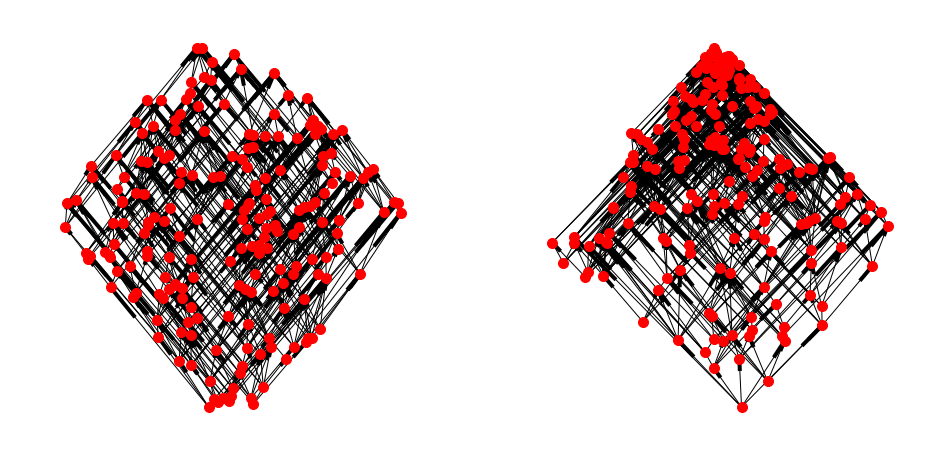

In [5]:
# draw the causal sets
f, axs = plt.subplots(1, 2, figsize=(16,8))
for i, G in enumerate([G_m, G_ds]): 
    draw_pos = {i:G.node[i]['position'][::-1] for i in range(N)}
    nx.draw(nx.transitive_reduction(G), pos=draw_pos, ax=axs[i], node_size=100)

In [12]:
names = ['Minkowski spacetime', 'de Sitter spacetime']
for i, G in enumerate([G_m, G_ds]):
    print names[i]
    N = G.number_of_nodes()
    print 'N: ', N
    print 'E: ', G.number_of_edges()
    print 'LP: ', len(nx.dag_longest_path(G))
    for k in [2,3,4]:
        C_k = dag.count_chains(G, k)
        print 'C_%s: %s' % (k, C_k)
        print 'MMD_%s: %s' % (k, dag.mmd_estimate(C_k, k, N))
    print 'MPSD: %s' % dag.mpsd(G)
    print '\n\n'

Minkowski spacetime
N:  200
E:  9766
LP:  25
C_2: 9766
MMD_2: 2.04
C_3: 207282
MMD_3: 2.04
C_4: 2399957
MMD_4: 2.05
MPSD: 2.0536379636



de Sitter spacetime
N:  200
E:  11920
LP:  28
C_2: 11920
MMD_2: 1.77
C_3: 332819
MMD_3: 1.79
C_4: 5291228
MMD_4: 1.81
MPSD: 1.78923290378





In [13]:
# measure curvature
for i, G in enumerate([G_m, G_ds]):
    print names[i]
    N = G.number_of_nodes()
    print 'N: ', N
    chains = [N]
    for k in [2,3]:
        C_k = dag.count_chains(G, k)
        chains.append(C_k)
    print dag.de_sitter_param_estimate(chains, initial_guess=)
    print '\n\n'

Minkowski spacetime
N:  200


NameError: name 'initial_guess' is not defined

In [15]:
print dag.de_sitter_param_estimate.__doc__

None
